In [30]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)         

In [4]:
import os
import numpy as np
import pandas as pd
from astropy.table import Table
from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr

from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)


from astropy.time import Time
from astropy.time import TimeYearDayTime
from datetime import datetime
import time
from time import strftime,strptime
import calendar
from dateutil.parser import parse

#from adjustText import adjust_text
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm
from collections import OrderedDict
#from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman' #'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_9002/3300942447.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM'

# [specutils](https://specutils.readthedocs.io/en/stable/spectrum1d.html)

In [136]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

In [137]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from specutils import Spectrum1D

Text(0, 0.5, 'Flux')

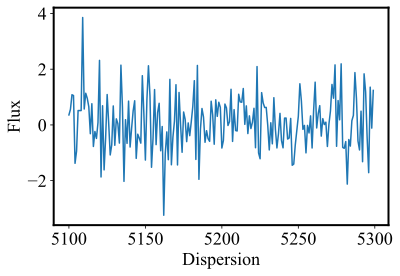

In [138]:
flux = np.random.randn(200)*u.Jy
wavelength = np.arange(5100, 5300)*u.AA
spec1d = Spectrum1D(spectral_axis=wavelength, flux=flux)
ax = plt.subplots()[1]  
ax.plot(spec1d.spectral_axis, spec1d.flux)  
ax.set_xlabel("Dispersion")  
ax.set_ylabel("Flux")  

## FermiAGN_onespec

In [1]:
from specutils import Spectrum1D
#spec1d = Spectrum1D.read("/path/to/file.fits")  
spec1d = Spectrum1D.read("/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_081229.fits")  

In [104]:
spec1d.flux

<Quantity [1.1266209e-15, 1.1412610e-15, 9.8170229e-16, 1.0151436e-15,
           1.1222400e-15, 1.1641857e-15, 1.0398727e-15, 1.2349952e-15,
           1.1105210e-15, 1.0509899e-15, 1.1447414e-15, 1.0297710e-15,
           1.2246313e-15, 1.0911630e-15, 1.1146085e-15, 1.2033122e-15,
           9.9350517e-16, 1.1254642e-15, 8.7163285e-16, 8.3757042e-16,
           1.0120503e-15, 9.7744119e-16, 9.3233838e-16, 9.3745562e-16,
           8.6317263e-16, 1.0225825e-15, 8.4097518e-16, 8.5135064e-16,
           8.9041385e-16, 9.6934260e-16, 9.5549880e-16, 8.2568549e-16,
           9.3355652e-16, 9.0135582e-16, 8.8829859e-16, 9.3312516e-16,
           8.3379832e-16, 9.3788909e-16, 8.2638027e-16, 9.0965536e-16,
           9.4180958e-16, 9.6272505e-16, 8.7941348e-16, 9.0715016e-16,
           8.9551383e-16, 8.6349366e-16, 9.1231441e-16, 9.1923361e-16,
           8.6275552e-16, 9.5555438e-16, 9.5965371e-16, 9.0914217e-16,
           9.1390048e-16, 9.2621158e-16, 9.6738701e-16, 9.1336473e-16,
      

In [105]:
spec1d.spectral_axis

<SpectralAxis [4000., 4004., 4008., 4012., 4016., 4020., 4024., 4028., 4032., 4036.,
   4040., 4044., 4048., 4052., 4056., 4060., 4064., 4068., 4072., 4076.,
   4080., 4084., 4088., 4092., 4096., 4100., 4104., 4108., 4112., 4116.,
   4120., 4124., 4128., 4132., 4136., 4140., 4144., 4148., 4152., 4156.,
   4160., 4164., 4168., 4172., 4176., 4180., 4184., 4188., 4192., 4196.,
   4200., 4204., 4208., 4212., 4216., 4220., 4224., 4228., 4232., 4236.,
   4240., 4244., 4248., 4252., 4256., 4260., 4264., 4268., 4272., 4276.,
   4280., 4284., 4288., 4292., 4296., 4300., 4304., 4308., 4312., 4316.,
   4320., 4324., 4328., 4332., 4336., 4340., 4344., 4348., 4352., 4356.,
   4360., 4364., 4368., 4372., 4376., 4380., 4384., 4388., 4392., 4396.,
   4400., 4404., 4408., 4412., 4416., 4420., 4424., 4428., 4432., 4436.,
   4440., 4444., 4448., 4452., 4456., 4460., 4464., 4468., 4472., 4476.,
   4480., 4484., 4488., 4492., 4496., 4500., 4504., 4508., 4512., 4516.,
   4520., 4524., 4528., 4532., 4536., 4

In [2]:
len(spec1d.spectral_axis)

889

spec1d.shift_spectrum_to(redshift=0.361)  # Equivalent: spec1d.redshift = 0.361
spec1d.spectral_axis

(4700.0, 5120.0)

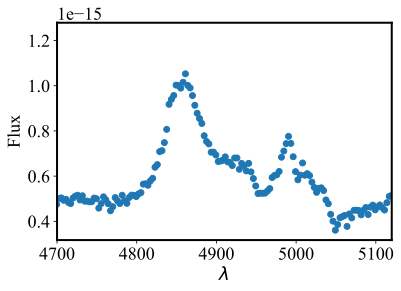

In [8]:
z = 0.361
ax = plt.subplots()[1]  
ax.scatter(spec1d.spectral_axis/(1+z), spec1d.flux)  
ax.set_xlabel("$\lambda$")  
ax.set_ylabel("Flux")  
ax.set_xlim(4700,5120)


# Fermi AGN_specs

In [21]:
!open /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510

## pks1510

In [9]:
from glob import glob
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits

# glob searches through directories similar to the Unix shell
filelist = glob('/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/*/*.fc.spec*.fits')
# sort alphabetically - given the way the filenames are
# this also sorts in time
filelist.sort()

In [10]:
len(filelist)

376

In [11]:
filelist

['/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_081229.fits',
 '/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_081230.fits',
 '/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_081231.fits',
 '/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_090101.fits',
 '/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_090128.fits',
 '/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_090129.fits',
 '/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.

In [89]:
sp = fits.open(filelist[0])
sp.info()

header = sp[0].header

wcs = WCS(header)
#make index array
index = np.arange(header['NAXIS1'])

wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
print(wavelength.shape)
#wavelength

#Ahh, this has the wrong dimension. So we flatten it.
wavelength = wavelength.flatten()

print(len(wavelength))

flux_pks1510_0 = sp[0].data

Filename: /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_081229.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (889,)   float32   
(889, 1)
889


array([1.1266209e-15, 1.1412610e-15, 9.8170229e-16, 1.0151436e-15,
       1.1222400e-15, 1.1641857e-15, 1.0398727e-15, 1.2349952e-15,
       1.1105210e-15, 1.0509899e-15, 1.1447414e-15, 1.0297710e-15,
       1.2246313e-15, 1.0911630e-15, 1.1146085e-15, 1.2033122e-15,
       9.9350517e-16, 1.1254642e-15, 8.7163285e-16, 8.3757042e-16,
       1.0120503e-15, 9.7744119e-16, 9.3233838e-16, 9.3745562e-16,
       8.6317263e-16, 1.0225825e-15, 8.4097518e-16, 8.5135064e-16,
       8.9041385e-16, 9.6934260e-16, 9.5549880e-16, 8.2568549e-16,
       9.3355652e-16, 9.0135582e-16, 8.8829859e-16, 9.3312516e-16,
       8.3379832e-16, 9.3788909e-16, 8.2638027e-16, 9.0965536e-16,
       9.4180958e-16, 9.6272505e-16, 8.7941348e-16, 9.0715016e-16,
       8.9551383e-16, 8.6349366e-16, 9.1231441e-16, 9.1923361e-16,
       8.6275552e-16, 9.5555438e-16, 9.5965371e-16, 9.0914217e-16,
       9.1390048e-16, 9.2621158e-16, 9.6738701e-16, 9.1336473e-16,
       9.3249603e-16, 9.5048648e-16, 1.0002712e-15, 9.8828109e

(4700.0, 5120.0)

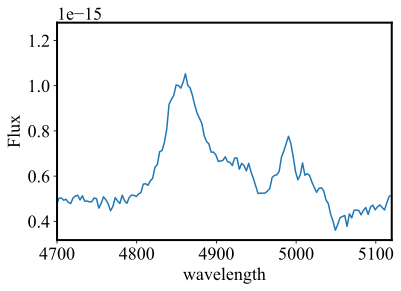

In [68]:
z = 0.361
ax = plt.subplots()[1]  
ax.plot(wavelength/(1+z), flux)  
ax.set_xlabel("wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4700,5120)

In [14]:
def read_spec(filename):
    '''Read a UVES spectrum from the ESO pipeline

    Parameters
    ----------
    filename : string
       name of the fits file with the data

    Returns
    -------
    wavelength : np.ndarray
        wavelength (in Ang)
    flux : np.ndarray
        flux (in erg/s/cm**2)
    date_obs : string
        time of observation
    '''
    sp = fits.open(filename)
    header = sp[0].header

    wcs = WCS(header)
    #make index array
    index = np.arange(header['NAXIS1'])

    wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
    wavelength = wavelength.flatten()
    flux = sp[0].data

    date_obs = header['Date-OBS']
    return wavelength, flux, date_obs

In [113]:
def plot_spec(filename,z = 0.361):
    wavelength, flux, date_obs=read_spec(filename)
    figure_n= 1
    fig = plt.figure(figsize=(4,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)    
    #ax = plt.subplots()[1]  
    ax.plot(wavelength/(1+z), flux)  
    ax.set_xlabel("wavelength")  
    ax.set_ylabel("Flux")  
    ax.set_xlim(4700,5120)
    ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
    return fig,ax

In [92]:
wavelength, flux, date_obs=read_spec(filelist[0])

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:title={'center':'pks1510.fc.spec_081229.fits'}, xlabel='wavelength', ylabel='Flux'>)

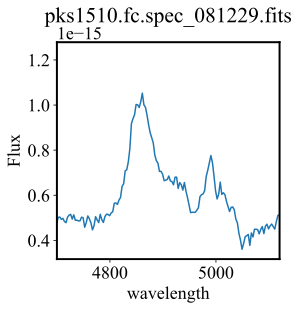

In [91]:
plot_spec(filelist[0])

plot_spec(filelist[1])

In [18]:
w, f, date_obs = read_spec(filelist[0])
print(w[0],w[1],w[-1],len(w))

4000.0 4004.0 7552.0 889


In [19]:
for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    print(w[0],w[1],w[1]-w[0],w[-1],len(w))

4000.0 4004.0 4.0 7552.0 889
4000.5 4004.5 4.0 7548.5 888
4000.10009765625 4004.10009765625 4.0 7548.10009765625 888
3998.5 4002.5 4.0 7550.5 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889


4000.9499511718773 4004.9499516487144 4.000000476837158 7548.950374126438 888
3999.85009765625 4003.85009765625 4.0 7551.85009765625 889
3998.60009765625 4002.60009765625 4.0 7550.60009765625 889
3998.4499511718773 4002.4499516487144 4.000000476837158 7550.450374603275 889
3999.39990234375 4003.39990234375 4.0 7551.39990234375 889
3998.89990234375 4002.89990234375 4.0 7550.89990234375 889
3998.35009765625 4002.35009765625 4.0 7550.35009765625 889
3998.64990234375 4002.64990234375 4.0 7550.64990234375 889
4001.800048828127 4005.8000485897082 3.999999761581421 7549.799837350846 888
3999.39990234375 4003.39990234375 4.0 7551.39990234375 889
3999.0 4003.0 4.0 7551.0 889
3999.27001953125 4003.27001953125 4.0 7551.27001953125 889
3999.85009765625 4003.85009765625 4.0 7551.85009765625 889
3999.3000488281227 4003.300048589704 3.999999761581421 7551.299837112423 889
3998.5 4002.5 4.0 7550.5 889
3998.39990234375 4002.39990234375 4.0 7550.39990234375 889
4001.949951171872 4005.949951648709 4.0000

3999.39990234375 4003.39990234375 4.0 7551.39990234375 889
4002.0 4006.0 4.0 7550.0 888
4001.39990234375 4005.39990234375 4.0 7549.39990234375 888
4000.000000000003 4004.0022549629243 4.002254962921143 7550.000152111054 888
4001.5 4005.5 4.0 7549.5 888
3998.60009765625 4002.60009765625 4.0 7550.60009765625 889
3998.39990234375 4002.39990234375 4.0 7550.39990234375 889
3998.699951171872 4002.699951648709 4.000000476837158 7550.70037460327 889
3999.9999999999977 4003.997747659681 3.9977476596832275 7549.999921798706 889
4000.0000000000036 4004.002254962925 4.002254962921143 7550.000152111055 888
4000.60009765625 4004.60009765625 4.0 7548.60009765625 888
3999.0 4003.0 4.0 7551.0 889
3999.39990234375 4003.39990234375 4.0 7551.39990234375 889
4001.89990234375 4005.89990234375 4.0 7549.89990234375 888
4001.39990234375 4005.39990234375 4.0 7549.39990234375 888
3998.14990234375 4002.14990234375 4.0 7550.14990234375 889
3998.199951171879 4002.1999516487163 4.000000476837158 7550.200374603277 88

3999.9999999999977 4003.997747659681 3.9977476596832275 7549.999921798706 889
4001.39990234375 4005.39990234375 4.0 7549.39990234375 888
3999.64990234375 4003.64990234375 4.0 7551.64990234375 889
4000.0 4004.0 4.0 7552.0 889
4001.89990234375 4005.89990234375 4.0 7549.89990234375 888
4000.3000488281255 4004.300048589707 3.999999761581421 7548.299837350845 888
3998.64990234375 4002.64990234375 4.0 7550.64990234375 889
4000.0 4004.0 4.0 7552.0 889
3998.39990234375 4002.39990234375 4.0 7550.39990234375 889
3999.89990234375 4003.89990234375 4.0 7551.89990234375 889
3999.699951171879 4003.6999516487163 4.000000476837158 7551.700374603277 889
3999.9999999999955 4004.0022549629166 4.002254962921143 7550.000152111046 888
3999.9999999999986 4003.997747659682 3.9977476596832275 7549.999921798707 889
4000.0000000000045 4003.997747659688 3.9977476596832275 7549.999921798713 889
4000.000000000004 4004.0022549629252 4.002254962921143 7550.000152111055 888
3999.9999999999973 4003.9977476596805 3.99774

3999.9999999999977 4004.002254962919 4.002254962921143 7550.000152111048 888
3998.3000488281255 4002.300048589707 3.999999761581421 7550.299837112427 889
4002.0 4006.0 4.0 7550.0 888
4000.0 4004.0 4.0 7552.0 889
3998.85009765625 4002.85009765625 4.0 7550.85009765625 889
4000.0000000000045 4004.0022549629257 4.002254962921143 7550.000152111055 888
3999.999999999996 4004.002254962917 4.002254962921143 7550.000152111047 888
4000.000000000003 4004.0022549629243 4.002254962921143 7550.000152111054 888
3999.9999999999995 4003.997747659683 3.9977476596832275 7549.999921798708 889
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
3999.64990234375 4003.64990234375 4.0 7551.64990234375 889
3999.10009765625 4003.10009765625 4.0 7551.10009765625 889
3999.8000488281227 4003.800048589704 3.999999761581421 7551.799837112423 889
4000.0 4003.9977476596832 3.9977476596832275 7549.999921798708 889
4000.0000000000023 4004.0022549629234 4.002254962921143 7550.0001521110535 888
400

4000.0 4003.9977476596832 3.9977476596832275 7549.999921798708 889
4000.000000000001 4004.002254962922 4.002254962921143 7550.000152111052 888
4000.0 4003.9977476596832 3.9977476596832275 7549.999921798708 889
3999.999999999998 4004.0022549629193 4.002254962921143 7550.00015211105 888
4000.0000000000045 4003.997747659688 3.9977476596832275 7549.999921798713 889
4000.0000000000005 4003.9977476596837 3.9977476596832275 7549.999921798709 889
4001.1999511718745 4005.1999516487117 4.000000476837158 7549.200374126436 888
4001.6999511718745 4005.6999516487117 4.000000476837158 7549.700374126436 888
3999.9999999999995 4004.0022549629207 4.002254962921143 7550.000152111051 888
3999.9999999999945 4004.0022549629157 4.002254962921143 7550.000152111046 888
3999.9999999999995 4004.0022549629207 4.002254962921143 7550.000152111051 888
3999.999999999996 4004.002254962917 4.002254962921143 7550.000152111047 888
3999.9999999999973 4004.0022549629184 4.002254962921143 7550.000152111048 888
3999.99999999

4000.0000000000036 4003.997747659687 3.9977476596832275 7549.9999217987115 889
4000.0000000000045 4003.997747659688 3.9977476596832275 7549.999921798713 889
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
3999.999999999998 4004.0022549629193 4.002254962921143 7550.000152111049 888
3999.999999999996 4003.997747659679 3.9977476596832275 7549.999921798704 889
4000.0000000000036 4004.002254962925 4.002254962921143 7550.000152111055 888
4000.000000000003 4003.9977476596864 3.9977476596832275 7549.9999217987115 889
4000.0000000000005 4004.0022549629216 4.002254962921143 7550.000152111052 888
4000.000000000002 4003.997747659685 3.9977476596832275 7549.99992179871 889
4000.000000000003 4004.0022549629243 4.002254962921143 7550.0001521110535 888
3999.9999999999964 4004.0022549629175 4.002254962921143 7550.000152111048 888
4000.0000000000005 4004.0022549629216 4.002254962921143 7550.000152111052 888
4000.000000000001 4004.002254962922 4.002254962921143 7550.0001521110

WARNING

4000.0000000000027 4004.002254962924 4.002254962921143 7550.0001521110535 888
3999.999999999999 4004.0022549629202 4.002254962921143 7550.00015211105 888
4001.0 4005.0 4.0 7549.0 888
4000.39990234375 4004.39990234375 4.0 7548.39990234375 888
3998.25 4002.25 4.0 7550.25 889
4001.699951171876 4005.699951648713 4.000000476837158 7549.700374126437 888
4000.300048828124 4004.3000485897055 3.999999761581421 7548.2998373508435 888
4000.199951171872 4004.199951648709 4.000000476837158 7548.2003741264325 888
4000.25 4004.25 4.0 7548.25 888
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
3999.9999999999955 4004.0022549629166 4.002254962921143 7550.000152111046 888
3999.999999999999 4003.9977476596823 3.9977476596832275 7549.999921798708 889
4000.000000000002 4003.997747659685 3.9977476596832275 7549.999921798711 889
3999.9999999999973 4003.9977476596805 3.9977476596832275 7549.999921798706 889
3999.9999999999977 4004.002254962919 4.002254962921143 7550.000152111048 88

: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 56304.000000 from DATE-OBS'. [astropy.wcs.wcs]


3999.999999999999 4004.0022549629202 4.002254962921143 7550.00015211105 888
3999.9999999999986 4003.997747659682 3.9977476596832275 7549.999921798707 889
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
4000.000000000004 4004.0022549629252 4.002254962921143 7550.000152111055 888
3999.9999999999973 4004.0022549629184 4.002254962921143 7550.000152111048 888
4000.5 4004.5 4.0 7548.5 888
4000.85009765625 4004.85009765625 4.0 7548.85009765625 888
3999.9999999999986 4003.997747659682 3.9977476596832275 7549.999921798707 889
4000.0 4003.9977476596832 3.9977476596832275 7549.999921798709 889
4000.000000000002 4004.002254962923 4.002254962921143 7550.0001521110535 888
3999.999999999996 4004.002254962917 4.002254962921143 7550.000152111047 888
4000.0000000000036 4004.002254962925 4.002254962921143 7550.000152111055 888
4000.0000000000005 4003.9977476596837 3.9977476596832275 7549.999921798709 8

WARNING

3999.9999999999964 4003.9977476596796 3.9977476596832275 7549.999921798705 889
3999.999999999996 4003.997747659679 3.9977476596832275 7549.999921798704 889
3998.89990234375 4002.89990234375 4.0 7550.89990234375 889
4000.050048828124 4004.0500485897055 3.999999761581421 7548.0498373508435 888
4000.0000000000036 4004.002254962925 4.002254962921143 7550.000152111054 888
3999.9999999999986 4003.997747659682 3.9977476596832275 7549.999921798707 889
3999.9999999999964 4004.0022549629175 4.002254962921143 7550.000152111048 888
3999.999999999998 4004.0022549629193 4.002254962921143 7550.000152111049 888
3999.9999999999986 4003.997747659682 3.9977476596832275 7549.999921798707 889
4000.0000000000027 4003.997747659686 3.9977476596832275 7549.9999217987115 889
4000.0 4003.9977476596832 3.9977476596832275 7549.999921798708 889
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
3999.9999999999945 4004.0022549629157 4.002254962921143 7550.000152111046 888
4000.0 4004.0022549

: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 56772.000000 from DATE-OBS'. [astropy.wcs.wcs]


4000.0000000000027 4003.997747659686 3.9977476596832275 7549.9999217987115 889
3998.35009765625 4002.35009765625 4.0 7550.35009765625 889
3999.0 4003.0 4.0 7551.0 889
3999.14990234375 4003.14990234375 4.0 7551.14990234375 889
3999.39990234375 4003.39990234375 4.0 7551.39990234375 889
3998.85009765625 4002.85009765625 4.0 7550.85009765625 889
3999.0 4003.0 4.0 7551.0 889
3999.35009765625 4003.35009765625 4.0 7551.35009765625 889
3998.60009765625 4002.60009765625 4.0 7550.60009765625 889
4001.10009765625 4005.10009765625 4.0 7549.10009765625 888
3998.449951171872 4002.449951648709 4.000000476837158 7550.45037460327 889
3999.10009765625 4003.10009765625 4.0 7551.10009765625 889
3999.199951171872 4003.199951648709 4.000000476837158 7551.20037460327 889
4000.75 4004.75 4.0 7548.75 888
3998.60009765625 4002.60009765625 4.0 7550.60009765625 889
4001.199951171876 4005.199951648713 4.000000476837158 7549.200374126437 888
4000.949951171876 4004.949951648713 4.000000476837158 7548.950374126437 88

3999.64990234375 4003.64990234375 4.0 7551.64990234375 889
3999.1999511718745 4003.1999516487117 4.000000476837158 7551.200374603273 889
4000.89990234375 4004.89990234375 4.0 7548.89990234375 888
3999.5 4003.5 4.0 7551.5 889
3998.89990234375 4002.89990234375 4.0 7550.89990234375 889
3998.1999511718745 4002.1999516487117 4.000000476837158 7550.200374603273 889
4001.699951171872 4005.699951648709 4.000000476837158 7549.7003741264325 888
3998.25 4002.25 4.0 7550.25 889
3999.10009765625 4003.10009765625 4.0 7551.10009765625 889
3999.85009765625 4003.85009765625 4.0 7551.85009765625 889
3998.10009765625 4002.10009765625 4.0 7550.10009765625 889
3998.10009765625 4002.10009765625 4.0 7550.10009765625 889
3998.6999511718745 4002.6999516487117 4.000000476837158 7550.700374603273 889
3999.5 4003.5 4.0 7551.5 889
3999.5 4003.5 4.0 7551.5 889
3998.5 4002.5 4.0 7550.5 889
3998.10009765625 4002.10009765625 4.0 7550.10009765625 889
3999.5 4003.5 4.0 7551.5 889
4000.5500488281255 4004.550048589707 3.9

WARNING

3998.6999511718773 4002.6999516487144 4.000000476837158 7550.700374603275 889
3998.60009765625 4002.60009765625 4.0 7550.60009765625 889
3999.64990234375 4003.64990234375 4.0 7551.64990234375 889
3999.3000488281214 4003.300048589703 3.999999761581421 7551.299837112422 889
3998.39990234375 4002.39990234375 4.0 7550.39990234375 889
3999.60009765625 4003.60009765625 4.0 7551.60009765625 889
4001.10009765625 4005.10009765625 4.0 7549.10009765625 888
4000.39990234375 4004.39990234375 4.0 7548.39990234375 888
3998.64990234375 4002.64990234375 4.0 7550.64990234375 889
3998.60009765625 4002.60009765625 4.0 7550.60009765625 889
4001.5 4005.5 4.0 7549.5 888
4000.89990234375 4004.89990234375 4.0 7548.89990234375 888
3999.5 4003.5 4.0 7551.5 889
4001.5 4005.5 4.0 7549.5 888
4001.5 4005.5 4.0 7549.5 888
4000.89990234375 4004.89990234375 4.0 7548.89990234375 888
4001.9499511718745 4005.9499516487117 4.000000476837158 7549.950374126436 888
4001.3000488281227 4005.300048589704 3.999999761581421 7549.2

: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 57192.000000 from DATE-OBS'. [astropy.wcs.wcs]


3999.999999999998 4004.0022549629193 4.002254962921143 7550.00015211105 888
4000.0000000000027 4003.997747659686 3.9977476596832275 7549.9999217987115 889
3999.999999999995 4003.997747659678 3.9977476596832275 7549.999921798703 889
4000.0000000000027 4004.002254962924 4.002254962921143 7550.0001521110535 888
3999.999999999998 4003.9977476596814 3.9977476596832275 7549.999921798706 889
3999.9999999999964 4003.9977476596796 3.9977476596832275 7549.999921798704 889
3999.999999999997 4003.99774765968 3.9977476596832275 7549.999921798705 889
3999.9999999999977 4004.002254962919 4.002254962921143 7550.000152111049 888
4000.000000000001 4004.002254962922 4.002254962921143 7550.000152111052 888
3999.9999999999977 4004.002254962919 4.002254962921143 7550.000152111048 888
3999.999999999999 4004.0022549629202 4.002254962921143 7550.00015211105 888
3999.999999999998 4003.9977476596814 3.9977476596832275 7549.999921798707 889
4000.0000000000005 4003.9977476596837 3.9977476596832275 7549.99992179870

3999.9999999999986 4004.00225496292 4.002254962921143 7550.00015211105 888
4000.0000000000023 4003.9977476596855 3.9977476596832275 7549.9999217987115 889
3999.999999999998 4004.0022549629193 4.002254962921143 7550.000152111049 888
3999.999999999997 4003.99774765968 3.9977476596832275 7549.999921798706 889
4000.000000000005 4003.9977476596882 3.9977476596832275 7549.999921798713 889
4000.000000000003 4003.9977476596864 3.9977476596832275 7549.9999217987115 889
3999.999999999996 4003.997747659679 3.9977476596832275 7549.999921798704 889
4000.0000000000045 4003.997747659688 3.9977476596832275 7549.999921798713 889
3999.9999999999955 4004.0022549629166 4.002254962921143 7550.000152111046 888
4000.000000000001 4004.002254962922 4.002254962921143 7550.000152111052 888
3999.9999999999955 4004.0022549629166 4.002254962921143 7550.000152111046 888
3999.9999999999964 4004.0022549629175 4.002254962921143 7550.000152111048 888
4000.0000000000005 4003.9977476596837 3.9977476596832275 7549.99992179

In [20]:
len(filelist),len(wavelength)

(376, 889)

In [21]:
#len(wavelength)
len_wavelength=888
fluxs = np.zeros((len(filelist), len_wavelength))
# date comes as string with 23 characters (dtype = 'S23')
dates = np.zeros((len(filelist)), dtype = 'S23')

for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    
    fluxs[i,:] = f[:len_wavelength]
    dates[i] = date_obs

wavelength_s

wavelength_restframe

In [50]:
fluxs.shape

(376, 888)

In [45]:
a = np.array([[1, 2], [3, 4],[5,6]])
np.std(a)

1.707825127659933

In [48]:
np.std(a, axis=0,) ,np.std(a, axis=0,ddof=1)  

(array([1.63299316, 1.63299316]), array([2., 2.]))

In [49]:
np.std(a, axis=1),np.std(a, axis=1,ddof=1)

(array([0.5, 0.5, 0.5]), array([0.70710678, 0.70710678, 0.70710678]))

In [51]:
a.shape

(3, 2)

### mean_spectrum

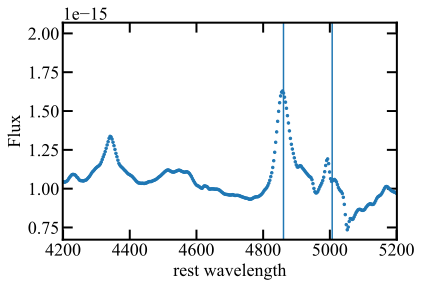

In [54]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1) 

z = 0.361
#ax = plt.subplots()[1]  
#ax.plot(wavelength/(1+z), flux)  
wavelength_s=wavelength[:len_wavelength]
wavelength_restframe=wavelength_s/(1+z)

ax.errorbar(wavelength_restframe,np.mean(fluxs,axis=0),ms=5,ls='',marker='.')
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4200-1,5200+1)
ax.axvline(5007)
ax.axvline(4861)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

In [34]:
len(np.mean(fluxs,axis=0))

888

### std_spectrum

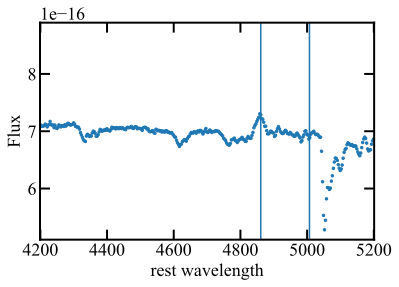

In [55]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1) 

z = 0.361
#ax = plt.subplots()[1]  
#ax.plot(wavelength/(1+z), flux)  
wavelength_s=wavelength[:len_wavelength]
wavelength_restframe=wavelength_s/(1+z)

ax.errorbar(wavelength_restframe,np.std(fluxs,axis=0,ddof=1),ms=5,ls='',marker='.')

ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4200-1,5200+1)
ax.axvline(5007)
ax.axvline(4861)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

### sigma_line

$$\lambda_{0} = \frac{\int{\lambda f_{\lambda} d\lambda}}{\int{f} d \lambda}$$

$$ \sigma^2_{line}= \frac{\int{\lambda^2 f_{\lambda} d\lambda}}{\int{f} d \lambda} - \lambda_{0}^2 $$

In [123]:
mean_spec=np.mean(fluxs,axis=0)
rms_spec= np.std(fluxs,axis=0,ddof=1)

delta_wavelength=4
lambda_0=  np.sum(wavelength[:888]*mean_spec*4)/np.sum(mean_spec*4)

sigma2_line= np.sum(wavelength[:888]**2*mean_spec*4)/np.sum(mean_spec*4)- lambda_0**2

print(sigma2_line)




1058489.692733895


In [124]:
mean_Spec_q =mean_spec*(u.erg * u.cm**-2 * u.s**-1*u.AA**-1)
rms_spec_q = rms_spec* (u.erg * u.cm**-2 * u.s**-1*u.AA**-1)

mean_Spec = Spectrum1D(spectral_axis=wavelength[:888]*u.AA, flux=mean_Spec_q )
rms_Spec = Spectrum1D(spectral_axis=wavelength[:888]*u.AA, flux=rms_spec_q )

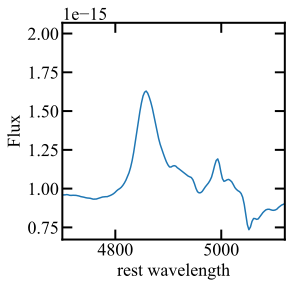

In [125]:
z=0.361

fig = plt.figure(figsize=(4,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)    
#ax = plt.subplots()[1]  
ax.plot(mean_Spec.spectral_axis/(1+z), mean_Spec.flux)  
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4700,5120)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

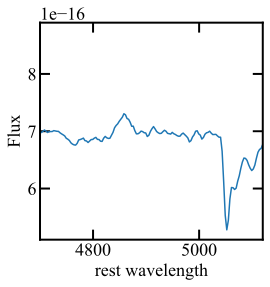

In [126]:
z=0.361

fig = plt.figure(figsize=(4,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)    
#ax = plt.subplots()[1]  
ax.plot(rms_Spec.spectral_axis/(1+z), rms_Spec.flux)  
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4700,5120)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

## pks0736

In [62]:
# glob searches through directories similar to the Unix shell
filelist_pks0736 = glob('/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks0736/*/*.fc.spec*.fits')
# sort alphabetically - given the way the filenames are
# this also sorts in time
filelist_pks0736.sort()

In [63]:
for i, fname in enumerate(filelist_pks0736):
    w, f, date_obs = read_spec(fname)
    print(w[0],w[1],w[1]-w[0],w[-1],len(w))

WARNING

4000.89990234375 4004.89990234375 4.0 7548.89990234375 888
4001.699951171876 4005.699951648713 4.000000476837158 7549.700374126437 888
4001.89990234375 4005.89990234375 4.0 7549.89990234375 888
3998.75 4002.75 4.0 7550.75 889
3998.3000488281227 4002.300048589704 3.999999761581421 7550.299837112423 889
3999.800048828124 4003.8000485897055 3.999999761581421 7551.799837112425 889
3998.89990234375 4002.89990234375 4.0 7550.89990234375 889
4000.60009765625 4004.60009765625 4.0 7548.60009765625 888
4001.25 4005.25 4.0 7549.25 888
3998.3000488281227 4002.300048589704 3.999999761581421 7550.299837112423 889
3999.10009765625 4003.10009765625 4.0 7551.10009765625 889
3999.39990234375 4003.39990234375 4.0 7551.39990234375 889
4000.39990234375 4004.39990234375 4.0 7548.39990234375 888
3998.699951171872 4002.699951648709 4.000000476837158 7550.70037460327 889
4001.35009765625 4005.35009765625 4.0 7549.35009765625 888
3999.35009765625 4003.35009765625 4.0 7551.35009765625 889
4000.10009765625 4004.1

: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 57457.000000 from DATE-OBS'. [astropy.wcs.wcs]
WARNING

4002.0 4006.0 4.0 7550.0 888
4000.4499511718745 4004.4499516487117 4.000000476837158 7548.450374126436 888
4001.39990234375 4005.39990234375 4.0 7549.39990234375 888
3998.5 4002.5 4.0 7550.5 889
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
3999.999999999994 4004.0022549629152 4.002254962921143 7550.000152111045 888
4000.0000000000027 4003.997747659686 3.9977476596832275 7549.999921798711 889
4000.0000000000045 4003.997747659688 3.9977476596832275 7549.999921798713 889
3999.9999999999955 4003.9977476596787 3.9977476596832275 7549.999921798704 889
4000.0000000000023 4003.9977476596855 3.9977476596832275 7549.999921798711 889
4000.0000000000045 4004.0022549629257 4.002254962921143 7550.000152111055 888
4000.000000000003 4003.9977476596864 3.9977476596832275 7549.9999217987115 889
4000.0 4003.9977476596832 3.9977476596832275 7549.999921798708 889
3999.9999999999977 4004.002254962919 4

: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 57785.000000 from DATE-OBS'. [astropy.wcs.wcs]


In [64]:
#len(wavelength)
len_wavelength=888
fluxs_pks0736 = np.zeros((len(filelist_pks0736), len_wavelength))
# date comes as string with 23 characters (dtype = 'S23')
dates_pks0736 = np.zeros((len(filelist_pks0736)), dtype = 'S23')

for i, fname in enumerate(filelist_pks0736):
    w, f, date_obs = read_spec(fname)
    
    fluxs_pks0736[i,:] = f[:len_wavelength]
    dates_pks0736[i] = date_obs

### mean_spec

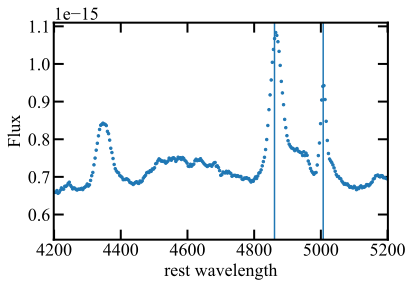

In [69]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1) 

z_pks0736 = 0.189
#ax = plt.subplots()[1]  
#ax.plot(wavelength/(1+z), flux)  
wavelength_s=wavelength[:len_wavelength]
wavelength_restframe=wavelength_s/(1+z_pks0736)

ax.errorbar(wavelength_restframe,np.mean(fluxs_pks0736,axis=0),ms=5,ls='',marker='.')
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4200-1,5200+1)
ax.axvline(5007)
ax.axvline(4861)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

### std_spec

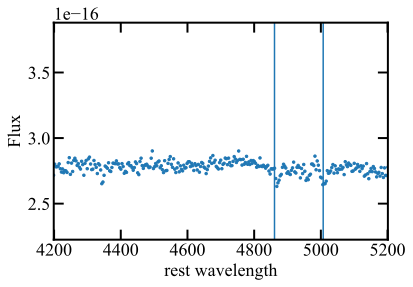

In [70]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1) 

z_pks0736 = 0.189
#ax = plt.subplots()[1]  
#ax.plot(wavelength/(1+z), flux)  
wavelength_s=wavelength[:len_wavelength]
wavelength_restframe=wavelength_s/(1+z_pks0736)

ax.errorbar(wavelength_restframe,np.std(fluxs_pks0736,axis=0,ddof=1),ms=5,ls='',marker='.')
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4200-1,5200+1)
ax.axvline(5007)
ax.axvline(4861)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

fluxs = np.zeros((len(filelist), len(wavelength)))
#date comes as string with 23 characters (dtype = 'S23')
dates = np.zeros((len(filelist)), dtype = 'S23')

for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    print(len(w),len(f))

### sigma_line

In [71]:
mean_spec_pks0736=np.mean(fluxs_pks0736,axis=0)
rms_spec_pks0736= np.std(fluxs_pks0736,axis=0,ddof=1)

delta_wavelength=4
lambda_0_pks0736=  np.sum(wavelength[:888]*mean_spec_pks0736*4)/np.sum(mean_spec_pks0736*4)

sigma2_line_pks0736= np.sum(wavelength[:888]**2*mean_spec_pks0736*4)/np.sum(mean_spec_pks0736*4)- lambda_0_pks0736**2

In [72]:
print(sigma2_line_pks0736)

1066512.5878764503


In [74]:
print(lambda_0,lambda_0_pks0736)

5547.984581707665 5709.695360575281


In [127]:
mean_Spec_pks0736 = Spectrum1D(spectral_axis=wavelength[:888]*u.AA, flux=mean_spec_pks0736*(u.erg * u.cm**-2 * u.s**-1*u.AA**-1) )
rms_Spec_pks0736 = Spectrum1D(spectral_axis=wavelength[:888]*u.AA, flux=rms_spec_pks0736* (u.erg * u.cm**-2 * u.s**-1*u.AA**-1) )

In [151]:
4861*(1+0.189)-200,4861*(1+0.189)+200

(5579.729, 5979.729)

In [152]:
fwhm(mean_Spec_pks0736,SpectralRegion(5500*u.AA, 5900*u.AA))

<Quantity 400. Angstrom>

In [153]:
gaussian_sigma_width(mean_Spec_pks0736), gaussian_fwhm(mean_Spec_pks0736) ,fwhm(mean_Spec_pks0736),fwzi(mean_Spec_pks0736)

(<Quantity 1032.72096322 Angstrom>,
 <Quantity 2431.87202512 Angstrom>,
 <Quantity 3548. Angstrom>,
 <Quantity 379.91509902 Angstrom>)

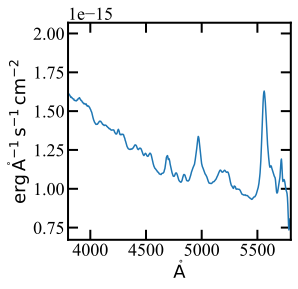

In [140]:
with quantity_support():
    fig = plt.figure(figsize=(4,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)    
    #ax = plt.subplots()[1]  
    ax.plot(mean_Spec.spectral_axis/(1+z_pks0736), mean_Spec.flux)  
    #ax.set_xlabel("rest wavelength")  
    #ax.set_ylabel("mean Flux")  
    ax.set_xlim(4000-200,5600+200)
    set_ax_tick(ax)
    #ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
    #return fig,ax

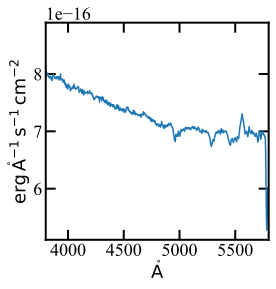

In [141]:
with quantity_support():
    fig = plt.figure(figsize=(4,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)    
    #ax = plt.subplots()[1]  
    ax.plot(rms_Spec.spectral_axis/(1+z_pks0736), rms_Spec.flux)  
    #ax.set_xlabel("rest wavelength")  
    #ax.set_ylabel("rms Flux")  
    ax.set_xlim(4000-200,5600+200)
    set_ax_tick(ax)
    #ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
    #return fig,ax

## StdDevUncertainty


In [101]:
from specutils import Spectrum1D
from astropy.nddata import StdDevUncertainty

spec = Spectrum1D(spectral_axis=np.arange(5000, 5010)*u.AA, flux=np.random.sample(10)*u.Jy, uncertainty=StdDevUncertainty(np.random.sample(10) * 0.1))


## [astropy-UVES](https://python4astronomers.github.io/astropy-UVES/UVES.html)

## [analysis](https://specutils.readthedocs.io/en/stable/analysis.html)

## noisy_gaussian

In [80]:
noisy_gaussian

<Spectrum1D(flux=<Quantity [ 2.48357077e-02, -6.91321506e-03,  3.23844269e-02,
            7.61514928e-02, -1.17076687e-02, -1.17068478e-02,
            7.89606408e-02,  3.83717365e-02, -2.34737192e-02,
            2.71280023e-02, -2.31708845e-02, -2.32864875e-02,
            1.20981139e-02, -9.56640117e-02, -8.62458909e-02,
           -2.81143753e-02, -5.06415543e-02,  1.57123692e-02,
           -4.54011999e-02, -7.06151793e-02,  7.32824470e-02,
           -1.12888024e-02,  3.37642880e-03, -7.12373821e-02,
           -2.72190965e-02,  5.54618726e-03, -5.75495952e-02,
            1.87850217e-02, -3.00317610e-02, -1.45844391e-02,
           -3.00849765e-02,  9.26144121e-02, -6.74149908e-04,
           -5.28845442e-02,  4.11286522e-02, -6.10402162e-02,
            1.04459177e-02, -9.79797089e-02, -6.64040566e-02,
            9.85028020e-03,  3.69332226e-02,  8.58192091e-03,
           -5.76404704e-03, -1.50303069e-02, -7.38925357e-02,
           -3.59471062e-02, -2.29715648e-02,  5.29366

In [88]:
flux

<Quantity [ 2.48357077e-02, -6.91321506e-03,  3.23844269e-02,
            7.61514928e-02, -1.17076687e-02, -1.17068478e-02,
            7.89606408e-02,  3.83717365e-02, -2.34737192e-02,
            2.71280023e-02, -2.31708845e-02, -2.32864875e-02,
            1.20981139e-02, -9.56640117e-02, -8.62458909e-02,
           -2.81143753e-02, -5.06415543e-02,  1.57123692e-02,
           -4.54011999e-02, -7.06151793e-02,  7.32824470e-02,
           -1.12888024e-02,  3.37642880e-03, -7.12373821e-02,
           -2.72190965e-02,  5.54618726e-03, -5.75495952e-02,
            1.87850217e-02, -3.00317610e-02, -1.45844391e-02,
           -3.00849765e-02,  9.26144121e-02, -6.74149908e-04,
           -5.28845442e-02,  4.11286522e-02, -6.10402162e-02,
            1.04459177e-02, -9.79797089e-02, -6.64040566e-02,
            9.85028020e-03,  3.69332226e-02,  8.58192091e-03,
           -5.76404704e-03, -1.50303069e-02, -7.38925357e-02,
           -3.59471062e-02, -2.29715648e-02,  5.29366059e-02,
        

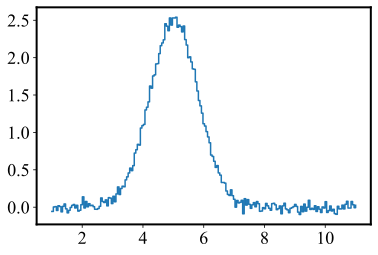

In [87]:
import numpy as np
from astropy import units as u
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models
from specutils import Spectrum1D, SpectralRegion
np.random.seed(42)


spectral_axis = np.linspace(11., 1., 200) * u.GHz
spectral_model = models.Gaussian1D(amplitude=5*(2*np.pi*0.8**2)**-0.5*u.Jy, mean=5*u.GHz, stddev=0.8*u.GHz)
flux = spectral_model(spectral_axis)
flux += np.random.normal(0., 0.05, spectral_axis.shape) * u.Jy
uncertainty = StdDevUncertainty(0.2*np.ones(flux.shape)*u.Jy)
noisy_gaussian = Spectrum1D(spectral_axis=spectral_axis, flux=flux, uncertainty=uncertainty)


import matplotlib.pyplot as plt 
plt.step(noisy_gaussian.spectral_axis, noisy_gaussian.flux) 

In [2]:
from specutils.analysis import snr
snr(noisy_gaussian)  

<Quantity 2.47730666>

In [105]:
snr(noisy_gaussian, SpectralRegion(6*u.GHz, 4*u.GHz))  

<Quantity 9.8300873>

In [106]:
from specutils.analysis import snr_derived
snr_derived(noisy_gaussian)  



<Quantity 1.13359867>

In [107]:
snr_derived(noisy_gaussian, SpectralRegion(6*u.GHz, 4*u.GHz))  

<Quantity 42.10020601>

## Line Flux Estimates

In [144]:
from specutils.analysis import line_flux
line_flux(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))  

line_flux(noisy_gaussian).to(u.erg * u.cm**-2 * u.s**-1)  

<Quantity 4.97951087e-14 erg / (cm2 s)>

In [145]:
flux = line_flux(noisy_gaussian)
flux.uncertainty.to(u.erg * u.cm**-2 * u.s**-1) 

<Quantity 1.42132016e-15 erg / (cm2 s)>

In [146]:
line_flux(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))  

<Quantity 4.93784874 GHz Jy>

In [148]:
from specutils.analysis import equivalent_width
noisy_gaussian_with_continuum = noisy_gaussian + 1*u.Jy
equivalent_width(noisy_gaussian_with_continuum)  



<Quantity -4.97951087 GHz>

In [149]:
equivalent_width(noisy_gaussian_with_continuum, regions=SpectralRegion(7*u.GHz, 3*u.GHz))  

<Quantity -4.93784874 GHz>

## centroid

In [150]:
from specutils.analysis import centroid
centroid(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))  

<Quantity 4.99909151 GHz>

## Line Widths

In [146]:
from specutils.analysis import gaussian_sigma_width, gaussian_fwhm, fwhm, fwzi

In [109]:
gaussian_sigma_width(noisy_gaussian) 

<Quantity 0.74075431 GHz>

In [110]:
gaussian_fwhm(noisy_gaussian) 

<Quantity 1.74434311 GHz>

In [111]:
fwhm(noisy_gaussian) 

<Quantity 1.86047666 GHz>

In [112]:
fwzi(noisy_gaussian) 

<Quantity 94.99997484 GHz>

## Dust extinction


Dust extinction can be applied to Spectrum1D instances via their internal arrays, using the dust_extinction package (http://dust-extinction.readthedocs.io/en/latest)

Below is an example of how to apply extinction.

In [ ]:
astropy.modeling.physical_models.BlackBody

from astropy.modeling.blackbody import blackbody_lambda
#from astropy.modeling.models import BlackBody
from dust_extinction.parameter_averages import F99

wave = np.logspace(np.log10(1000), np.log10(3e4), num=10) * u.AA
flux = blackbody_lambda(wave, 10000 * u.K)
spec = Spectrum1D(spectral_axis=wave, flux=flux)

#define the model
ext = F99(Rv=3.1)

#extinguish (redden) the spectrum
flux_ext = spec.flux * ext.extinguish(spec.spectral_axis, Ebv=0.5)
spec_ext = Spectrum1D(spectral_axis=wave, flux=flux_ext)

In [143]:
from astropy.modeling.models import BlackBody
from dust_extinction.parameter_averages import F99

wave = np.logspace(np.log10(1000), np.log10(3e4), num=10) * u.AA
bb = BlackBody(10000 * u.K)
flux = bb(wave)


In [144]:
spec = Spectrum1D(spectral_axis=wave, flux=flux)

# define the model
ext = F99(Rv=3.1)

# extinguish (redden) the spectrum
flux_ext = spec.flux * ext.extinguish(spec.spectral_axis, Ebv=0.5)
spec_ext = Spectrum1D(spectral_axis=wave, flux=flux_ext)

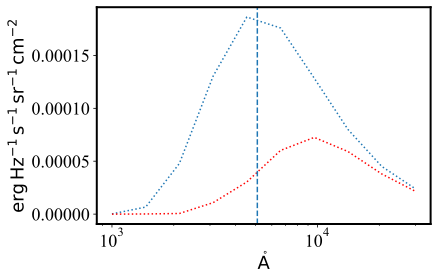

In [145]:
with quantity_support():
    plt.figure()
    plt.semilogx(wave, flux,ls=':')
    plt.semilogx(wave, flux_ext,c='r',ls=':')
    
    plt.axvline(bb.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
    
    plt.show()

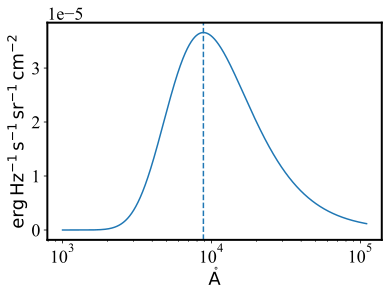

In [131]:


bb_1 = BlackBody(temperature=5778*u.K)
wav_1 = np.arange(1000, 110000) * u.AA
flux_1  = bb_1(wav_1)

with quantity_support():
    plt.figure()
    plt.semilogx(wav_1, flux_1)
    plt.axvline(bb_1.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
    plt.show()

## Template Cross-correlation

In [136]:
from specutils.analysis import correlation

size = 200
spec_axis = np.linspace(4500., 6500., num=size) * u.AA
f1 = np.random.randn(size)*0.5 * u.Jy
f2 = np.random.randn(size)*0.5 * u.Jy
rest_value = 6000. * u.AA
mean1 = 5035. * u.AA
mean2 = 5015. * u.AA
g1 = models.Gaussian1D(amplitude=30 * u.Jy, mean=mean1, stddev=10. * u.AA)
g2 = models.Gaussian1D(amplitude=30 * u.Jy, mean=mean2, stddev=10. * u.AA)
flux1 = f1 + g1(spec_axis)
flux2 = f2 + g2(spec_axis)
uncertainty = StdDevUncertainty(0.2*np.ones(size)*u.Jy)
ospec = Spectrum1D(spectral_axis=spec_axis, flux=flux1, uncertainty=uncertainty, velocity_convention='optical', rest_value=rest_value)
tspec = Spectrum1D(spectral_axis=spec_axis, flux=flux2, uncertainty=uncertainty)
corr, lag = correlation.template_correlate(ospec, tspec)

/Users/lyubing/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


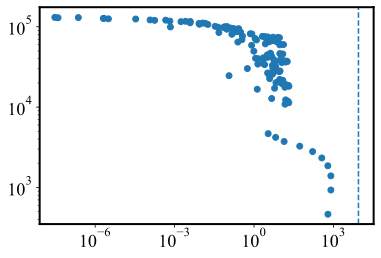

In [143]:
plt.figure()
plt.scatter(corr, lag)
plt.semilogx()
plt.semilogy()
plt.axvline(bb_1.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
plt.show()